In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\Tuck\anaconda3\envs\ML-GPU\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Tuck\anaconda3\envs\ML-GPU\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is 

In [3]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
# Проверить максимальный индекс
max([max(sequence) for sequence in train_data])

9999

In [4]:
# Декодирование отзыва
word_index=imdb.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_review=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
# Подготовка данных
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results=np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [73]:
# Конструирование нейронной сети
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [74]:
# Компиляция модели
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [75]:
# Создание проверочного набора
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [76]:
# Обучение модели
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4971 - acc: 0.7905 - val_loss: 0.3932 - val_acc: 0.8474
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2853 - acc: 0.9070 - val_loss: 0.3027 - val_acc: 0.8790
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2021 - acc: 0.9329 - val_loss: 0.2713 - val_acc: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1525 - acc: 0.9482 - val_loss: 0.2775 - val_acc: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1161 - acc: 0.9621 - val_loss: 0.3229 - val_acc: 0.8753
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0880 - acc: 0.9727 - val_loss: 0.3779 - val_acc: 0.8708
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0732 - acc: 0.9763 - val_loss: 0.3859 - val_acc: 0.8762
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0547 - a

In [77]:
history_dict=history.history

In [78]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

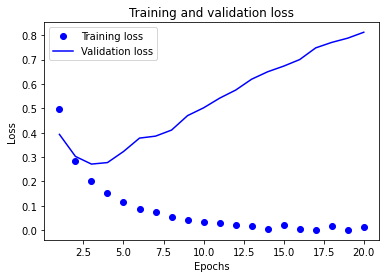

In [79]:
# График потерь
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

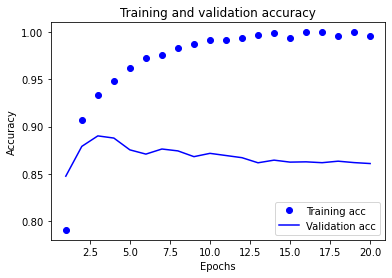

In [80]:
# График точности
val_acc = history_dict['val_acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [81]:
# Обучение модели с нуля
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4987 - accuracy: 0.7983
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2812 - accuracy: 0.9063
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2102 - accuracy: 0.9274
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2864 - accuracy: 0.8872


In [71]:
print(results)

[0.08716078847646713, 0.8824800252914429]


In [72]:
# Использование нейронной сети
model.predict(x_test)

array([[0.20153032],
       [0.9973392 ],
       [0.9362595 ],
       ...,
       [0.2615128 ],
       [0.13448724],
       [0.70452213]], dtype=float32)

In [1]:
# Проверка использования GPU
import tensorflow as tf
print(tf.test.gpu_device_name())
print(tf.test.is_built_with_cuda())

'/device:GPU:0'